In [1]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from numpy import std, mean
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.experimental import enable_hist_gradient_boosting
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

/opt/homebrew/lib/python3.11/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
# Read the data
df = pd.read_csv('Data/colon-dataset-processed.csv')

In [3]:
#target variable
y=df['Class']

#features
X=df.drop(['Class'], axis=1)

#SMOTE
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

# Check distribution after SMOTE
print('Resampled dataset distribution %s' % Counter(y_res))

#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=123)

Resampled dataset distribution Counter({'diagnosed': 50, 'healthy': 50})


In [4]:
# just to understand the data
n_samples, n_features = X.shape
print(f"The dataset consists of {n_samples} samples and {n_features} features")

The dataset consists of 115 samples and 16 features


In [5]:
# define the model
import sklearn
model = HistGradientBoostingClassifier()
# fit the model on the whole dataset
model.fit(X_train, y_train)

HistGradientBoostingClassifier()

In [6]:
#evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9500


In [12]:
#classification report 
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

   diagnosed       1.00      0.89      0.94         9
     healthy       0.92      1.00      0.96        11

    accuracy                           0.95        20
   macro avg       0.96      0.94      0.95        20
weighted avg       0.95      0.95      0.95        20



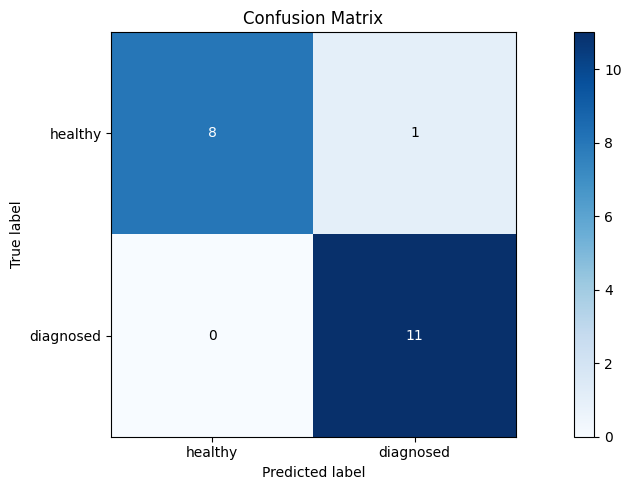

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
def plot_confusion_matrix(cm, classes):
    fig, ax = plt.subplots(figsize=(12, 5))
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title='Confusion Matrix',
           ylabel='True label',
           xlabel='Predicted label')

    # Display the text on the matrix
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > cm.max() / 2 else "black")

    plt.tight_layout()
    plt.show()

plot_confusion_matrix(cm, df['Class'].unique())


In [11]:
#save model
import pickle
with open('HGB_undersample.pkl', 'wb') as file:
    pickle.dump(model, file)

In [7]:
#grip search

# define models and parameters
model = HistGradientBoostingClassifier()

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
    'max_iter': [50, 100, 200],
    'max_leaf_nodes': [15, 31, 63, 127],
    'min_samples_leaf': [5, 10, 20],
    'l2_regularization': [0.0, 0.1, 1.0]
}

cv=KFold(n_splits=5, random_state=42, shuffle=True)

grid = GridSearchCV(estimator=model,
                    param_grid=param_grid, n_jobs=-1, 
                    cv=cv, 
                    scoring='accuracy',
                    error_score=0)

grid_result = grid.fit(X_train, y_train)

In [8]:
grid_result.best_params_

{'l2_regularization': 0.0,
 'learning_rate': 0.01,
 'max_iter': 50,
 'max_leaf_nodes': 15,
 'min_samples_leaf': 10}

In [9]:
#bulid model with best parameters
best_model= grid.best_estimator_
y_pred1 = best_model.predict(X_test)

In [10]:
accuracy = accuracy_score(y_test, y_pred1)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8500


In [16]:
report1= classification_report(y_test, y_pred1)
print(report1)

              precision    recall  f1-score   support

   diagnosed       0.80      0.89      0.84         9
     healthy       0.90      0.82      0.86        11

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.86      0.85      0.85        20



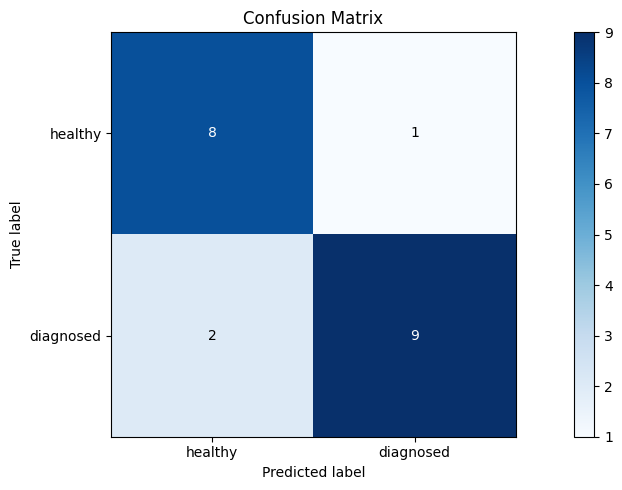

In [15]:
cm1=confusion_matrix(y_test, y_pred1)
plot_confusion_matrix(cm1, df['Class'].unique())